<a href="https://colab.research.google.com/github/macgyver121/DADS7202_hw1/blob/main/DADS_7202_Hw1_13922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('SG_usedcar.csv')

In [3]:
df.head()

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN


## Cleansing Data

In [4]:
df = df.replace('N.A', np.NaN)
df = df.replace('N.A.', np.NaN)

In [5]:
df.isnull().sum()

Brand               0
Type                0
Reg_date           20
Coe_left           22
Dep               786
Mileage          1560
Road Tax          428
Dereg Value       965
COE               259
Engine Cap          3
Curb Weight        80
Manufactured       20
Transmission        0
OMV               418
ARF                13
Power              23
No. of Owners      72
Price             735
Unnamed: 18      4396
dtype: int64

In [6]:
del df['Unnamed: 18']

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Brand            0
Type             0
Reg_date         0
Coe_left         0
Dep              0
Mileage          0
Road Tax         0
Dereg Value      0
COE              0
Engine Cap       0
Curb Weight      0
Manufactured     0
Transmission     0
OMV              0
ARF              0
Power            0
No. of Owners    0
Price            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 1 to 4409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2494 non-null   object
 1   Type           2494 non-null   object
 2   Reg_date       2494 non-null   object
 3   Coe_left       2494 non-null   object
 4   Dep            2494 non-null   object
 5   Mileage        2494 non-null   object
 6   Road Tax       2494 non-null   object
 7   Dereg Value    2494 non-null   object
 8   COE            2494 non-null   object
 9   Engine Cap     2494 non-null   object
 10  Curb Weight    2494 non-null   object
 11  Manufactured   2494 non-null   object
 12  Transmission   2494 non-null   object
 13  OMV            2494 non-null   object
 14  ARF            2494 non-null   object
 15  Power          2494 non-null   object
 16  No. of Owners  2494 non-null   object
 17  Price          2494 non-null   object
dtypes: object(18)
memory usage: 

---------------------------

เอาเข้า openrefine 
- เปลี่ยน type
- ปรับ brand ให้รวมเป็นยี่ห้อเดียวกัน

-----------------------------------

In [10]:
df = pd.read_csv('SG_usedcar_clean2.csv')

In [11]:
df.head()

,Unnamed: 0,Brand,Type,Coe_left(yrs),Dep($),Mileage(mile),Road Tax($),Dereg Value($),COE($),Engine Cap(cc),Curb Weight(kg),Manufactured(yrs),Transmission,OMV($),ARF($),Power,No. of Owners,Price($)
0,0,Honda,SUV,4,10310,50000,682,31237,56001,1496,1190,6,1,19775,9775,96,2,49800
1,1,Suzuki,Hatchback,1,8210,203000,1030,6656,21349,1586,1060,14,0,12154,13370,92,2,12800
2,2,Porsche,Sports Car,6,34200,21000,1200,106829,50110,1988,1365,4,1,71979,101563,220,1,259988
3,3,Hyundai,Mid-Sized Sedan,3,11010,35000,738,31339,64900,1591,1292,7,1,13856,13856,97,1,44800
4,4,Kia,Mid-Sized Sedan,8,9450,21200,738,38416,30009,1591,1287,3,1,18894,18894,93,1,85800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2494 non-null   int64 
 1   Brand              2494 non-null   object
 2   Type               2494 non-null   object
 3   Coe_left(yrs)      2494 non-null   int64 
 4   Dep($)             2494 non-null   int64 
 5   Mileage(mile)      2494 non-null   int64 
 6   Road Tax($)        2494 non-null   int64 
 7   Dereg Value($)     2494 non-null   int64 
 8   COE($)             2494 non-null   int64 
 9   Engine Cap(cc)     2494 non-null   int64 
 10  Curb Weight(kg)    2494 non-null   int64 
 11  Manufactured(yrs)  2494 non-null   int64 
 12  Transmission       2494 non-null   int64 
 13  OMV($)             2494 non-null   int64 
 14  ARF($)             2494 non-null   int64 
 15  Power              2494 non-null   int64 
 16  No. of Owners      2494 non-null   int64 


In [13]:
df['Brand'] = df['Brand'].astype(str)
df['Type'] = df['Type'].astype(str)
df['Transmission'] = df['Transmission'].astype(str)

In [14]:
df = df.drop(columns = ['Unnamed: 0'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              2494 non-null   object
 1   Type               2494 non-null   object
 2   Coe_left(yrs)      2494 non-null   int64 
 3   Dep($)             2494 non-null   int64 
 4   Mileage(mile)      2494 non-null   int64 
 5   Road Tax($)        2494 non-null   int64 
 6   Dereg Value($)     2494 non-null   int64 
 7   COE($)             2494 non-null   int64 
 8   Engine Cap(cc)     2494 non-null   int64 
 9   Curb Weight(kg)    2494 non-null   int64 
 10  Manufactured(yrs)  2494 non-null   int64 
 11  Transmission       2494 non-null   object
 12  OMV($)             2494 non-null   int64 
 13  ARF($)             2494 non-null   int64 
 14  Power              2494 non-null   int64 
 15  No. of Owners      2494 non-null   int64 
 16  Price($)           2494 non-null   int64 


## EDA 

### Distribution Graph

In [16]:
def set_style(ax):
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.3, color='black')

In [17]:
# Black - Aqua Blue - Pink
colors = ["#09101F","#72DDF7", '#F7AEF8']

In [18]:
def hist(df, x, ax, main_color=colors[1], second_color=colors[0], bins=30):
    
    sns.histplot(data=df, x=x, bins=bins, ax=ax,
                 kde=True, color=main_color,
                 edgecolor=second_color, line_kws={"linestyle":'--'}, linewidth=3
                )
    ax.lines[0].set_color(second_color)
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

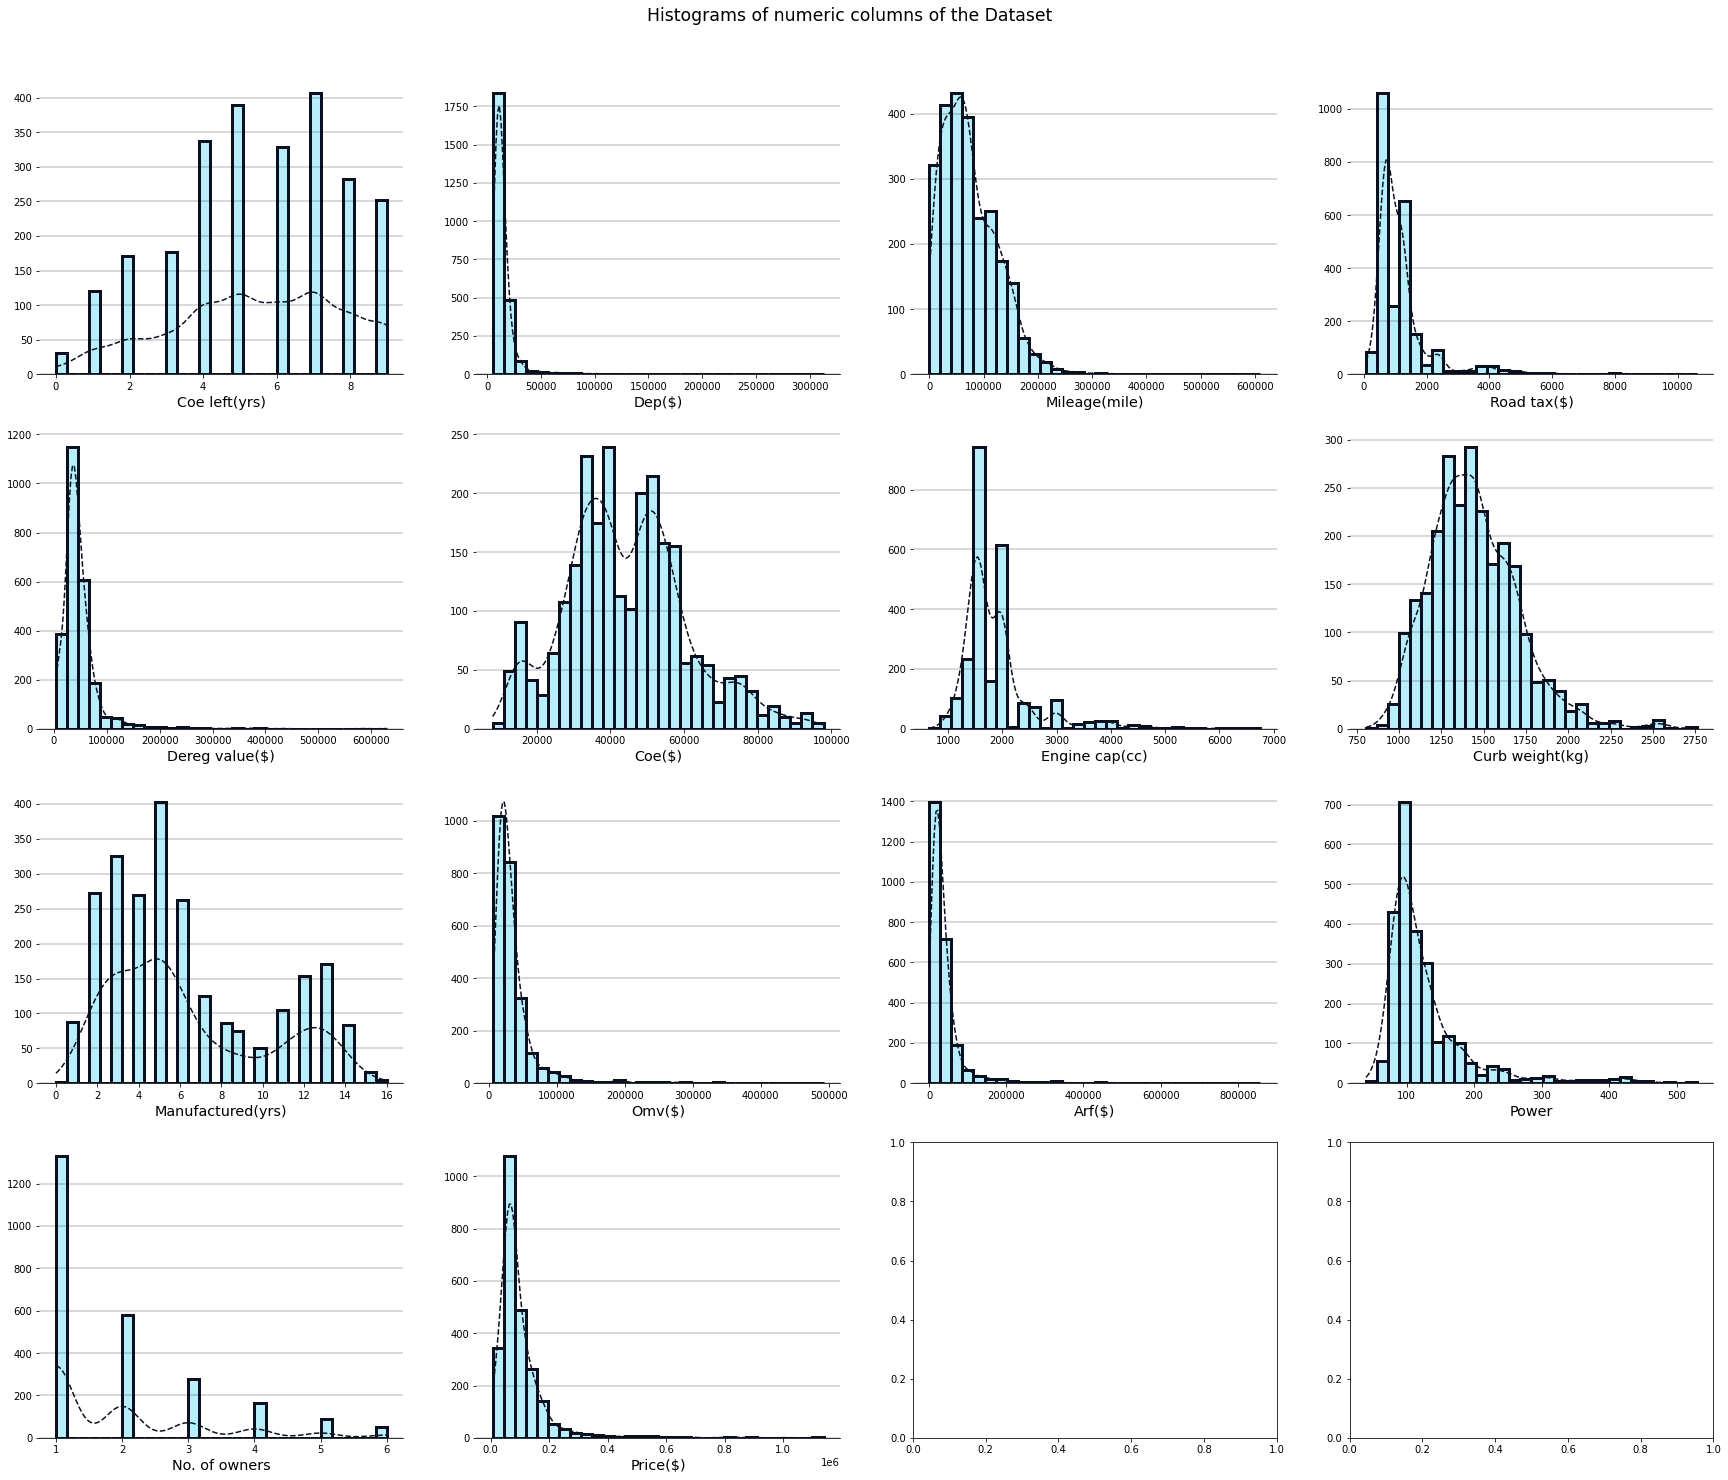

In [19]:
cols = ['Coe_left(yrs)', 'Dep($)', 'Mileage(mile)', 'Road Tax($)', 'Dereg Value($)', 'COE($)', 'Engine Cap(cc)',
       'Curb Weight(kg)', 'Manufactured(yrs)', 'OMV($)', 'ARF($)', 'Power', 'No. of Owners', 'Price($)' ]

fig, axs = plt.subplots(4, 4, figsize=(30, 25))

for i, col in enumerate(cols):
    
    row_index = i // 4
    col_index = i % 4
    
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
    
plt.show()

In [20]:
def count(df, x, ax, main_color=colors[2], second_color=colors[0]):
    
    ax.bar(df[x].value_counts().index, df[x].value_counts().values,
           color=main_color, edgecolor=second_color, linewidth=3)
    
    set_style(ax)
    
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

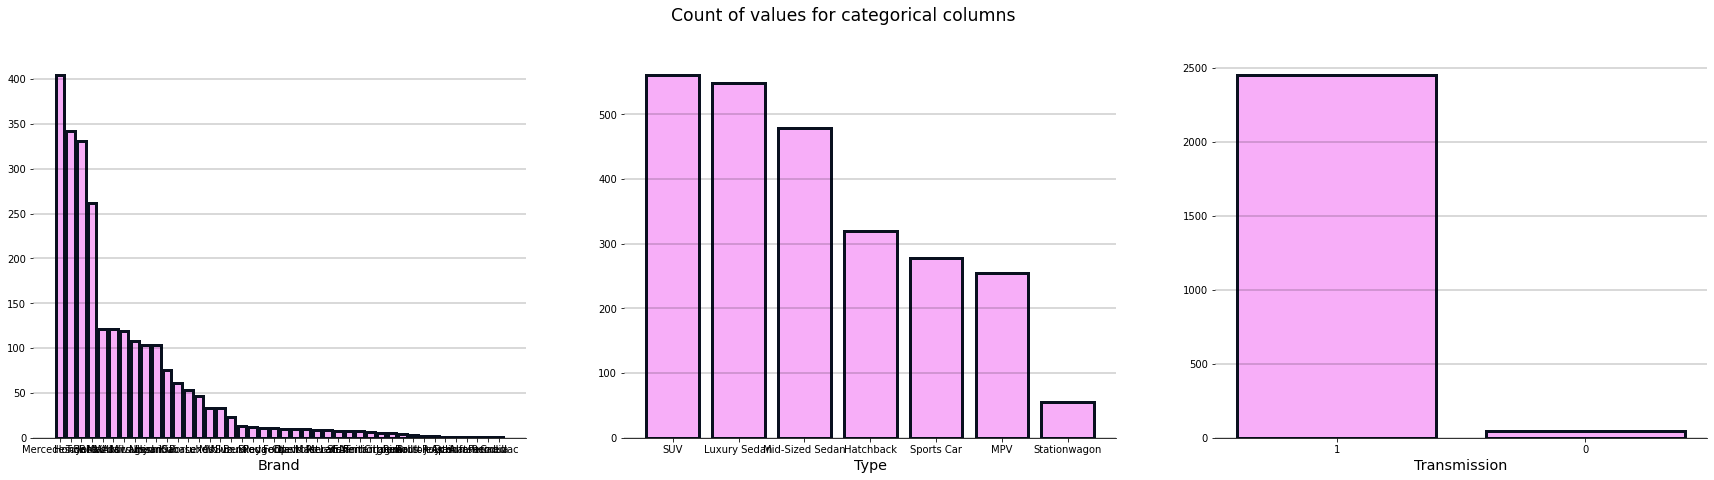

In [21]:
cols = ['Brand', 'Type', 'Transmission']

fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):
    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


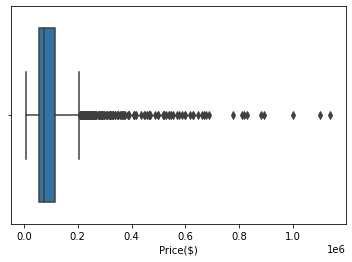

In [22]:
sns.boxplot(df['Price($)'])

In [23]:
df['Brand'].value_counts().head()

Mercedes-Benz    404
Honda            342
Toyota           331
BMW              262
Mazda            121
Name: Brand, dtype: int64

In [24]:
df['Type'].value_counts().head()

SUV                560
Luxury Sedan       549
Mid-Sized Sedan    478
Hatchback          319
Sports Car         278
Name: Type, dtype: int64

In [25]:
df['Transmission'].value_counts().head()

1    2450
0      44
Name: Transmission, dtype: int64

### Correlation

#### Correlation Graph

In [26]:
def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):
    
    sns.regplot(data=df, x=x, y=y, ax=ax, 
                 color=main_color, ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidth':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

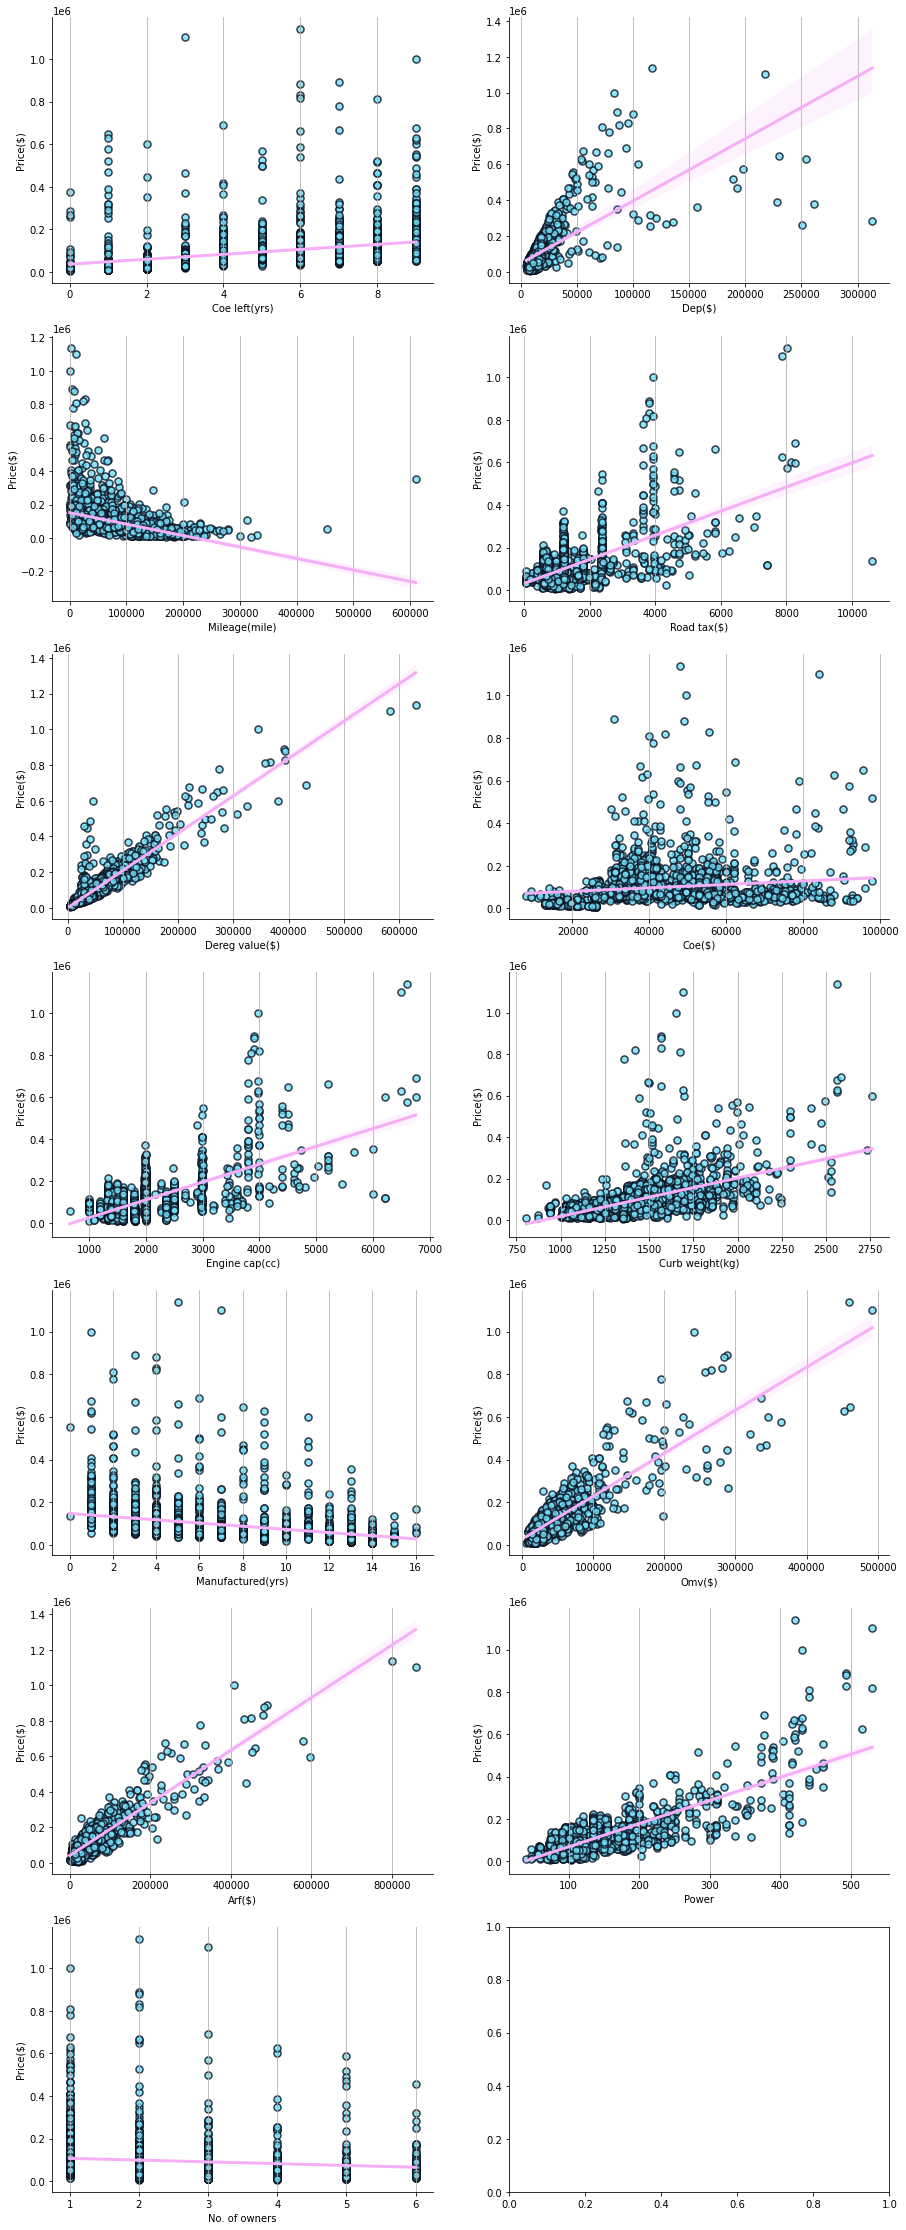

In [27]:
cols = ['Coe_left(yrs)', 'Dep($)', 'Mileage(mile)', 'Road Tax($)', 'Dereg Value($)', 'COE($)', 'Engine Cap(cc)',
       'Curb Weight(kg)', 'Manufactured(yrs)', 'OMV($)', 'ARF($)', 'Power', 'No. of Owners' ]

fig, axs = plt.subplots(7, 2,figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, col,'Price($)', ax)

plt.show()

In [28]:
def stripplot(df, x, y, ax, palette=[colors[1], colors[2]]):
    
    sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
                 linewidth=2, size=8)
    
    set_style(ax)

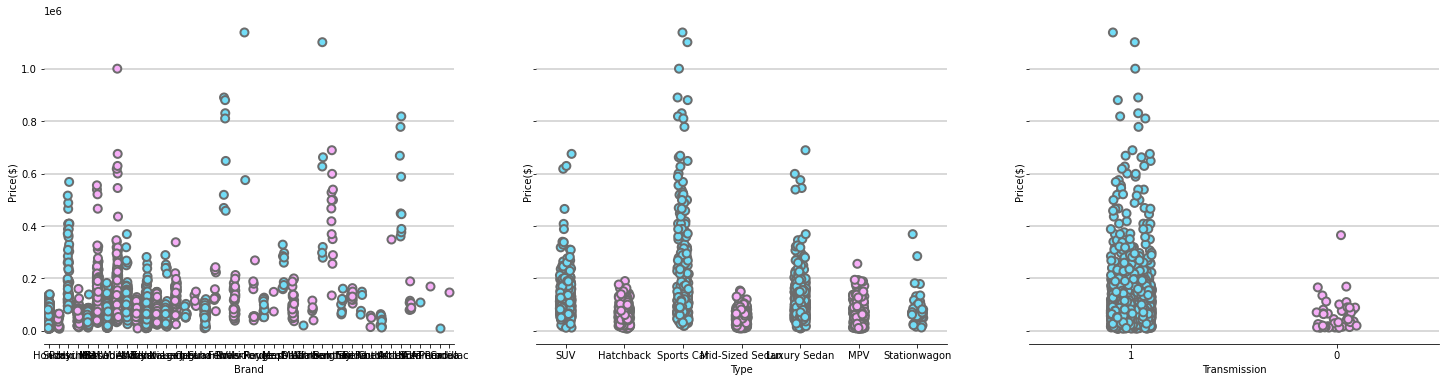

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), sharey=True)

for i, col in enumerate(['Brand', 'Type', 'Transmission']):
    
    stripplot(df, col, 'Price($)', axs[i])
    
    axs[i].set(
        xlabel=col.replace("_", " ").capitalize(),
        ylabel="Price($)"
    )

plt.show()

#### Correlation Matrix

In [30]:
def corr_map(df, ax, palette, edgecolor=colors[0]):
    
    corr = df.corr()
    
    sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor=edgecolor,
               vmin=-1, vmax=1, fmt=".2f")

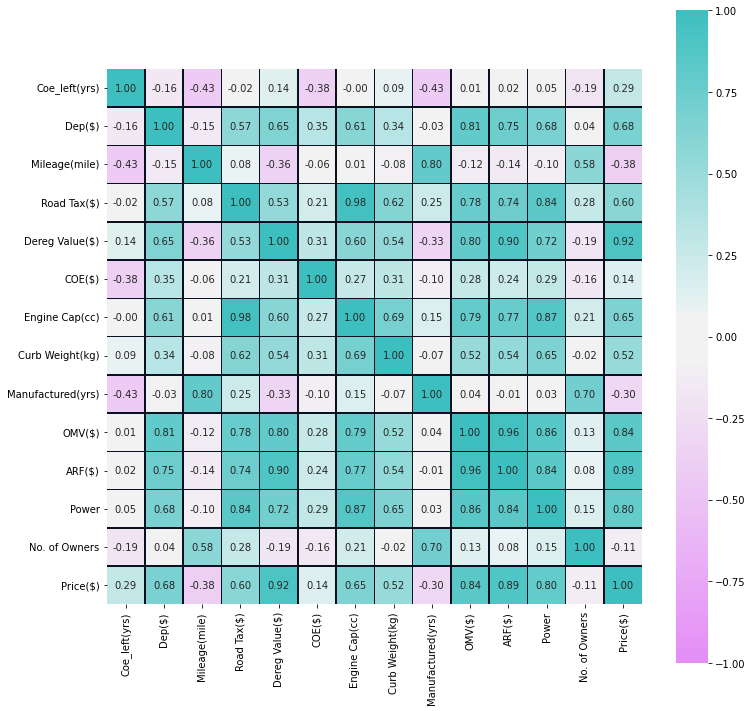

In [31]:
fig, ax = plt.subplots(figsize=(12, 12))

palette = sns.diverging_palette(299, 192, s=89, l=71, as_cmap=True, sep=20)

corr_map(df, ax, palette)

## Data pre-processing

### Create Dummy Variable

In [32]:
df1 = pd.get_dummies(data=df, drop_first=True)

In [33]:
df1.tail()

,Coe_left(yrs),Dep($),Mileage(mile),Road Tax($),Dereg Value($),COE($),Engine Cap(cc),Curb Weight(kg),Manufactured(yrs),OMV($),...,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Type_Luxury Sedan,Type_MPV,Type_Mid-Sized Sedan,Type_SUV,Type_Sports Car,Type_Stationwagon,Transmission_1
2489,6,17990,55000,1210,68148,39000,1998,1530,4,45675,...,0,0,0,1,0,0,0,0,0,1
2490,3,7500,172892,1447,14045,19657,1994,1485,11,19090,...,0,0,0,0,0,0,1,0,0,1
2491,2,15240,127000,740,35772,73989,1595,1485,8,29525,...,0,0,0,1,0,0,0,0,0,1
2492,6,9340,40200,682,35419,42801,1496,1310,4,15108,...,0,0,0,0,0,1,0,0,0,1
2493,4,10590,120000,1208,39265,74501,1995,1566,6,13772,...,0,0,0,0,0,0,1,0,0,1


### Data splitting

In [34]:
X = df1.drop(['Price($)'], axis=1).values
y = df1['Price($)'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.30)

### Data scaling

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

ss = StandardScaler()

ss.fit(X)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

### Recheck shape and reshape

In [37]:
y_train = y_train.reshape(1745,1)

In [38]:
y_train.shape

(1745, 1)

## Polynomial regression + Ridge Model 

In [39]:
from datetime import datetime
start_time = datetime.now()

from sklearn.linear_model import Ridge

poly_reg=PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X_train_scaled)

X_poly_test = poly_reg.fit_transform(X_test_scaled)

train_mae = list()
test_mae = list()

alpha = [i for i in range(780, 820, 10)]
for i in alpha :
    clf = Ridge(alpha=i)
    clf.fit(X_poly, y_train)
    
    y_pred = clf.predict(X_poly)
    y_pred_test = clf.predict(X_poly_test)
        
    train_mae.append(mean_absolute_error(y_train, y_pred))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    
for i, alpha in enumerate(alpha):
    print("--"*10, f" alpha={alpha} ", "--"*10)
    print(f"TRAIN MAE -> {train_mae[i]}")
    print(f"TEST MAE -> {test_mae[i]}")

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

--------------------  alpha=780  --------------------
TRAIN MAE -> 3006.093683796977
TEST MAE -> 7690.623479003015
--------------------  alpha=790  --------------------
TRAIN MAE -> 3016.1316367181216
TEST MAE -> 7690.4213839487875
--------------------  alpha=800  --------------------
TRAIN MAE -> 3026.0661480016443
TEST MAE -> 7690.424055326757
--------------------  alpha=810  --------------------
TRAIN MAE -> 3035.9101989232036
TEST MAE -> 7690.474460833435
Duration: 0:00:18.385362


In [40]:
from datetime import datetime
start_time = datetime.now()

from sklearn.linear_model import Ridge

poly_reg=PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X_train_scaled)

X_poly_test = poly_reg.fit_transform(X_test_scaled)

train_mae = list()
test_mae = list()

alphas = [i for i in range(0, 2000, 100)]
for i in alphas :
    clf = Ridge(alpha=i)
    clf.fit(X_poly, y_train)
    
    y_pred = clf.predict(X_poly)
    y_pred_test = clf.predict(X_poly_test)
        
    train_mae.append(mean_absolute_error(y_train, y_pred))
    test_mae.append(mean_absolute_error(y_test, y_pred_test))
    
for i, alpha in enumerate(alphas):
    print("--"*10, f" alpha={alpha} ", "--"*10)
    print(f"TRAIN MAE -> {train_mae[i]}")
    print(f"TEST MAE -> {test_mae[i]}")

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


--------------------  alpha=0  --------------------
TRAIN MAE -> 11.17892927140363
TEST MAE -> 160721.13595089948
--------------------  alpha=100  --------------------
TRAIN MAE -> 1781.3063991063138
TEST MAE -> 8377.504569991435
--------------------  alpha=200  --------------------
TRAIN MAE -> 2122.143349838698
TEST MAE -> 8007.585067642293
--------------------  alpha=300  --------------------
TRAIN MAE -> 2352.141326608867
TEST MAE -> 7862.044288957502
--------------------  alpha=400  --------------------
TRAIN MAE -> 2530.422146954464
TEST MAE -> 7768.7234105747675
--------------------  alpha=500  --------------------
TRAIN MAE -> 2679.1331044584513
TEST MAE -> 7719.174778911722
--------------------  alpha=600  --------------------
TRAIN MAE -> 2808.300264513284
TEST MAE -> 7697.126029878663
--------------------  alpha=700  --------------------
TRAIN MAE -> 2922.684602889218
TEST MAE -> 7692.456834408543
--------------------  alpha=800  --------------------
TRAIN MAE -> 3026.066148

In [41]:
i_alpha_optim = np.argmin(test_mae)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


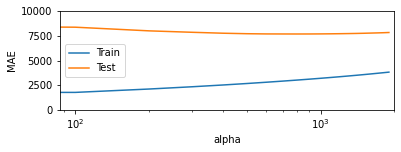

In [42]:
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_mae, label="Train")
plt.semilogx(alphas, test_mae, label="Test")
plt.xlim([0, 2000])
plt.ylim([0, 10000])
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.legend()
plt.show()

## MLP model

### data formating

In [43]:
y_test = y_test.reshape(-1,1)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [44]:
print('X_train shape :',X_train.shape, 'X_train type :',X_train.dtype)
print('y_train shape :',y_train.shape, 'X_test type :',X_test.dtype)
print('X_test shape :',X_test.shape, 'y_train type :',y_train.dtype)
print('y_test shape :',y_test.shape, 'y_test type :',y_test.dtype)

X_train shape : (1745, 61) X_train type : float32
y_train shape : (1745, 1) X_test type : float32
X_test shape : (749, 61) y_train type : float32
y_test shape : (749, 1) y_test type : float32


### Create the network architecture

In [45]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-80a726e0-20de-8d28-cbfc-cd78f2ca1ef8)


In [46]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

NumPy 1.21.6

TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [47]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 20, 
                                        restore_best_weights = True)

In [48]:
from datetime import datetime
start_time = datetime.now()

np.random.seed(1234)
tf.random.set_seed(5678)

model = tf.keras.models.Sequential()

# Input layer
model.add( tf.keras.Input(shape=(61, ) ))
# Dense
model.add(tf.keras.layers.Dense(64, activation='relu', name = 'dense1'))
model.add(tf.keras.layers.Dense(32, activation='relu', name = 'dense2'))
model.add(tf.keras.layers.Dense(16, activation='relu', name = 'dense3'))
model.add(tf.keras.layers.Dense(8, activation='relu', name = 'dense4'))
# Output layer
model.add(tf.keras.layers.Dense(1, activation='linear', name = 'output') )

# Configure the model and start training
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=2, verbose=1, validation_split=0.3, callbacks=[earlystopping])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/200
611/611 [==============================] - 5s 4ms/step - loss: 77805.7812 - mean_absolute_error: 77805.7812 - val_loss: 33735.2773 - val_mean_absolute_error: 33735.2773
Epoch 2/200
611/611 [==============================] - 2s 3ms/step - loss: 26226.6387 - mean_absolute_error: 26226.6387 - val_loss: 20668.1758 - val_mean_absolute_error: 20668.1758
Epoch 3/200
611/611 [==============================] - 2s 4ms/step - loss: 20221.6250 - mean_absolute_error: 20221.6250 - val_loss: 18193.0664 - val_mean_absolute_error: 18193.0664
Epoch 4/200
611/611 [==============================] - 2s 4ms/step - loss: 17813.1484 - mean_absolute_error: 17813.1484 - val_loss: 16608.3223 - val_mean_absolute_error: 16608.3223
Epoch 5/200
611/611 [==============================] - 2s 3ms/step - loss: 16087.0957 - mean_absolute_error: 16087.0957 - val_loss: 15927.7256 - val_mean_absolute_error: 15927.7256
Epoch 6/200
611/611 [==============================] - 2s 3ms/step - loss: 14786.7910 - mean_ab

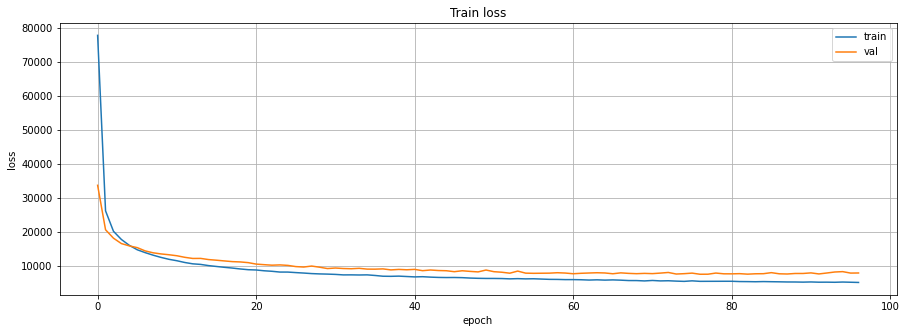

In [49]:
# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [50]:
y_pred_test = model.predict( X_test_scaled ) 

In [51]:
print(f"MAE MLP of y = ", mean_absolute_error(y_test,y_pred_test))

MAE MLP of y =  7332.434


## Evaluation model on test set

### Round1

In [52]:
from datetime import datetime
start_time = datetime.now()

model1 = tf.keras.models.Sequential()

# Input layer
model1.add( tf.keras.Input(shape=(61, ) ))
# Dense
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dense(32, activation='relu'))
model1.add(tf.keras.layers.Dense(16, activation='relu'))
model1.add(tf.keras.layers.Dense(8, activation='relu'))
# Output layer
model1.add(tf.keras.layers.Dense(1, activation='linear', name = 'output') )

# Configure the model and start training
model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history1 = model1.fit(X_train_scaled, y_train, epochs=200, batch_size=2, verbose=1, validation_split=0.3, callbacks =[earlystopping])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/200
611/611 [==============================] - 3s 5ms/step - loss: 70834.1016 - mean_absolute_error: 70834.1016 - val_loss: 27662.5156 - val_mean_absolute_error: 27662.5156
Epoch 2/200
611/611 [==============================] - 2s 4ms/step - loss: 23298.3047 - mean_absolute_error: 23298.3047 - val_loss: 19044.9902 - val_mean_absolute_error: 19044.9902
Epoch 3/200
611/611 [==============================] - 2s 3ms/step - loss: 19069.7227 - mean_absolute_error: 19069.7227 - val_loss: 16984.9141 - val_mean_absolute_error: 16984.9141
Epoch 4/200
611/611 [==============================] - 2s 3ms/step - loss: 16628.2441 - mean_absolute_error: 16628.2441 - val_loss: 15377.2002 - val_mean_absolute_error: 15377.2002
Epoch 5/200
611/611 [==============================] - 2s 3ms/step - loss: 15100.6631 - mean_absolute_error: 15100.6631 - val_loss: 14408.9150 - val_mean_absolute_error: 14408.9150
Epoch 6/200
611/611 [==============================] - 2s 3ms/step - loss: 13958.3066 - mean_ab

In [53]:
y_pred_test_m1 = model1.predict( X_test_scaled ) 
mae_m = []
mae_m1 = mean_absolute_error(y_test,y_pred_test_m1)
print(f"MAE MLP of y = ", mae_m1)
mae_m.append(mae_m1)

MAE MLP of y =  7367.4326


### Round2

In [54]:
from datetime import datetime
start_time = datetime.now()

model2 = tf.keras.models.Sequential()

# Input layer
model2.add( tf.keras.Input(shape=(61, ) ))
# Dense
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
# Output layer
model2.add(tf.keras.layers.Dense(1, activation='linear', name = 'output') )

# Configure the model and start training
model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history2 = model2.fit(X_train_scaled, y_train, epochs=200, batch_size=2, verbose=1, validation_split=0.3, callbacks =[earlystopping])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/200
611/611 [==============================] - 4s 5ms/step - loss: 84624.1562 - mean_absolute_error: 84624.1562 - val_loss: 44143.3750 - val_mean_absolute_error: 44143.3750
Epoch 2/200
611/611 [==============================] - 2s 3ms/step - loss: 29063.1426 - mean_absolute_error: 29063.1426 - val_loss: 21709.3770 - val_mean_absolute_error: 21709.3770
Epoch 3/200
611/611 [==============================] - 2s 4ms/step - loss: 20623.8887 - mean_absolute_error: 20623.8887 - val_loss: 18350.5664 - val_mean_absolute_error: 18350.5664
Epoch 4/200
611/611 [==============================] - 2s 3ms/step - loss: 17788.7559 - mean_absolute_error: 17788.7559 - val_loss: 16368.7559 - val_mean_absolute_error: 16368.7559
Epoch 5/200
611/611 [==============================] - 2s 3ms/step - loss: 15836.5664 - mean_absolute_error: 15836.5664 - val_loss: 15258.6660 - val_mean_absolute_error: 15258.6660
Epoch 6/200
611/611 [==============================] - 2s 4ms/step - loss: 14419.4727 - mean_ab

In [55]:
y_pred_test_m2 = model2.predict( X_test_scaled ) 
mae_m2 = mean_absolute_error(y_test,y_pred_test_m2)
print(f"MAE MLP of y = ", mae_m2)
mae_m.append(mae_m2)

MAE MLP of y =  7849.0386


### Round3

In [56]:
from datetime import datetime
start_time = datetime.now()

model3 = tf.keras.models.Sequential()

# Input layer
model3.add( tf.keras.Input(shape=(61, ) ))
# Dense
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dense(16, activation='relu'))
model3.add(tf.keras.layers.Dense(8, activation='relu'))
# Output layer
model3.add(tf.keras.layers.Dense(1, activation='linear', name = 'output') )

# Configure the model and start training
model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history3 = model3.fit(X_train_scaled, y_train, epochs=200, batch_size=2, verbose=1, validation_split=0.3, callbacks =[earlystopping])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/200
611/611 [==============================] - 5s 5ms/step - loss: 79377.9766 - mean_absolute_error: 79377.9766 - val_loss: 34156.9414 - val_mean_absolute_error: 34156.9414
Epoch 2/200
611/611 [==============================] - 2s 4ms/step - loss: 26271.7148 - mean_absolute_error: 26271.7148 - val_loss: 21048.3516 - val_mean_absolute_error: 21048.3516
Epoch 3/200
611/611 [==============================] - 2s 3ms/step - loss: 20367.3242 - mean_absolute_error: 20367.3242 - val_loss: 18131.4922 - val_mean_absolute_error: 18131.4922
Epoch 4/200
611/611 [==============================] - 2s 4ms/step - loss: 17889.4785 - mean_absolute_error: 17889.4785 - val_loss: 16232.9883 - val_mean_absolute_error: 16232.9883
Epoch 5/200
611/611 [==============================] - 2s 3ms/step - loss: 16118.7207 - mean_absolute_error: 16118.7207 - val_loss: 15317.6719 - val_mean_absolute_error: 15317.6719
Epoch 6/200
611/611 [==============================] - 2s 3ms/step - loss: 14838.7939 - mean_ab

In [57]:
y_pred_test_m3 = model3.predict( X_test_scaled ) 
mae_m3 = mean_absolute_error(y_test,y_pred_test_m3)
print(f"MAE MLP of y = ", mae_m3)
mae_m.append(mae_m3)

MAE MLP of y =  7149.075


### Round4

In [58]:
from datetime import datetime
start_time = datetime.now()

model4 = tf.keras.models.Sequential()

# Input layer
model4.add( tf.keras.Input(shape=(61, ) ))
# Dense
model4.add(tf.keras.layers.Dense(64, activation='relu'))
model4.add(tf.keras.layers.Dense(32, activation='relu'))
model4.add(tf.keras.layers.Dense(16, activation='relu'))
model4.add(tf.keras.layers.Dense(8, activation='relu'))
# Output layer
model4.add(tf.keras.layers.Dense(1, activation='linear', name = 'output') )

# Configure the model and start training
model4.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history4 = model4.fit(X_train_scaled, y_train, epochs=200, batch_size=2, verbose=1, validation_split=0.3, callbacks =[earlystopping])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/200
611/611 [==============================] - 4s 5ms/step - loss: 74339.4453 - mean_absolute_error: 74339.4453 - val_loss: 30309.3027 - val_mean_absolute_error: 30309.3027
Epoch 2/200
611/611 [==============================] - 2s 4ms/step - loss: 24407.0156 - mean_absolute_error: 24407.0156 - val_loss: 19968.7090 - val_mean_absolute_error: 19968.7090
Epoch 3/200
611/611 [==============================] - 2s 4ms/step - loss: 19395.4199 - mean_absolute_error: 19395.4199 - val_loss: 17450.4297 - val_mean_absolute_error: 17450.4297
Epoch 4/200
611/611 [==============================] - 2s 3ms/step - loss: 16850.4492 - mean_absolute_error: 16850.4492 - val_loss: 15741.8320 - val_mean_absolute_error: 15741.8320
Epoch 5/200
611/611 [==============================] - 2s 3ms/step - loss: 15089.9736 - mean_absolute_error: 15089.9736 - val_loss: 14784.6699 - val_mean_absolute_error: 14784.6699
Epoch 6/200
611/611 [==============================] - 2s 3ms/step - loss: 13804.3408 - mean_ab

In [59]:
y_pred_test_m4 = model4.predict( X_test_scaled ) 
mae_m4 = mean_absolute_error(y_test,y_pred_test_m4)
print(f"MAE MLP of y = ", mae_m4)
mae_m.append(mae_m4)

MAE MLP of y =  7373.3364


### Round5

In [60]:
from datetime import datetime
start_time = datetime.now()

model5 = tf.keras.models.Sequential()

# Input layer
model5.add( tf.keras.Input(shape=(61, ) ))
# Dense
model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dense(32, activation='relu'))
model5.add(tf.keras.layers.Dense(16, activation='relu'))
model5.add(tf.keras.layers.Dense(8, activation='relu'))
# Output layer
model5.add(tf.keras.layers.Dense(1, activation='linear', name = 'output') )

# Configure the model and start training
model5.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history5 = model5.fit(X_train_scaled, y_train, epochs=200, batch_size=2, verbose=1, validation_split=0.3, callbacks =[earlystopping])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/200
611/611 [==============================] - 4s 5ms/step - loss: 87001.6953 - mean_absolute_error: 87001.6953 - val_loss: 45430.8281 - val_mean_absolute_error: 45430.8281
Epoch 2/200
611/611 [==============================] - 2s 3ms/step - loss: 30468.2480 - mean_absolute_error: 30468.2480 - val_loss: 22635.8926 - val_mean_absolute_error: 22635.8926
Epoch 3/200
611/611 [==============================] - 2s 3ms/step - loss: 21340.6543 - mean_absolute_error: 21340.6543 - val_loss: 18870.6094 - val_mean_absolute_error: 18870.6094
Epoch 4/200
611/611 [==============================] - 2s 4ms/step - loss: 18594.8496 - mean_absolute_error: 18594.8496 - val_loss: 16835.3223 - val_mean_absolute_error: 16835.3223
Epoch 5/200
611/611 [==============================] - 2s 4ms/step - loss: 16810.8457 - mean_absolute_error: 16810.8457 - val_loss: 15741.6641 - val_mean_absolute_error: 15741.6641
Epoch 6/200
611/611 [==============================] - 2s 3ms/step - loss: 15575.5645 - mean_ab

In [61]:
y_pred_test_m5 = model5.predict( X_test_scaled ) 
mae_m5 = mean_absolute_error(y_test,y_pred_test_m5)
print(f"MAE MLP of y = ", mae_m5)
mae_m.append(mae_m5)

MAE MLP of y =  7112.0576


In [62]:
print(np.mean(mae_m))
print(np.std(mae_m))

7370.1885
262.61667
